# Esercitazione 6

In questa esercitazione vogliamo simulare il modello di Ising unodimensionale sfruttando l'algoritmo di Metropolis e di Gibbs per generare l'evoluzione delle configurazioni del sistema e andare a visualizzare il suo comportamento a diverse temperature.

## Modello di Ising 1D

Il magnetismo di un materiale dipende dai momenti di dipolo magnetici combinati dei molti spin atomici presenti all'interno di esso. Il modello di Ising spiega il magnetismo dei materiali postulando un reticolo, nel nostro caso una catena visto che studiamo il caso unodimensionale, in cui ad ogni nodo e' presente un dipolo magnetico cioe' uno spin. \
Questi spin sono assunti prendere i valori piu' semplici possibili: variabili scalari $s_i$ che possono assumere solo due valori, +1 o -1, che rappresentano un dipolo di intensita' unitaria che punta, rispettivamente, verso l'alto o verso il basso. In questo modo, l'intero reticolo puo' essere trovato in $2^N$ configurazioni diverse, dove N e' il numero di spin. 

L'energia di una particolare configurazione è definita da una Hamiltoniana composta da una interazione di scambio proporzionale alla somma dei prodotti dello spin i-esimo con il (i+1)-esimo e dalla interazione degli spin col campo esterno, che e' simmetrizzata in modo che compaia sia per lo spin i-esimo che per l'i+1-esimo cosi' da essere anch'essa simmetrica per la parte di exchange interaction. In particolare, possiamo scrivere questa Hamiltoniana come: 

$$H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$ 

dove teniamo conto dell'interazione tra primi vicini e J e' la tendenza degli elettroni ad allinearsi tra loro parallelamente o antiparallelamente a causa dell'interazione di scambio: nel nostro caso studieremo un sistema ferromagnetico quindi J>0, in particolare J=1, in cui gli spin vorrebbero allinearsi fra loro.

L'energia di un sistema di Ising dipende, quindi, dall'orientazione di ciascuno spin. La probabilità che il sistema si trovi in un determinato stato dipende dall'energia: è, percio', possibile implementare algoritmi che esplorano lo spazio delle fasi ricercando le configurazioni più probabili. La probabilita' di trovare una particolare configurazione in dipendenza dello spin e' dato dal peso di Boltzmann: stiamo, infatti, studiando un ensemble canonico in cui, oltre al numero di particelle e al volume, si mantiene costante anche la temperatura grazie al contatto termico con un serbatoio di calore che, avendo capacita' termica molto maggiore di quella del nostro sistema, compensa le variazioni di temperature del nostro sistema continuando a scambiare calore con esso.

Gli algoritmi di campionamento determinano in che modo lo spazio delle configurazioni viene visitato siccome riguardano il meccanismo con cui ogni passo viene eseguito e accettato.
Dovremo, dunque, campionare il peso di Boltzmann per andare a generare nuove configurazioni su cui valuteremo l'hamiltoniana del sistema. Per fare cio' utilizzeremo due metodi:
- Algoritmo di Metropolis;
- Algoritmo di Gibbs.

Ci addentreremo meglio nel funzionamento di questi due nei successivi paragrafi.

Per andare a costruire la nostra catena di spin ipotizziamo di lavorare in periodic boundary conditions, i.e lo spin n+1 e’ uguale allo spin 1 in modo che la catena sia chiusa. In questo modo ci assicuriamo che tutti gli spin siano equivalenti e il sistema sia invariante per traslazioni.


### Algoritmo di Metropolis

Il primo algoritmo con cui andremo a generare nuove configurazioni del sistema campionando il peso di Boltzmann e' l'algormitmo di Metropolis. \
Esso parte da uno stato di spin scelto casualmente, propone di flipparlo e accetta la mossa proposta con probabilita' :

$$A(b|a)=min[1, exp(-\beta (E_b-E_a)) ]$$ 

cioe' si accetta sempre il flip se questo porta ad una riduzione dell'energia del sistema, perche' A=1, mentre se la mossa aumenta l'energia accettereremo il flip con probabilita' $e^{-\beta (E_b-E_a)}$. A livello di codice, estrarremo un nuovo numero random in $[0,1)$ e lo paragoniamo con la probabilita' calcolata: se il numero estratto e' minore accettiamo il flip, se no rigettiamo la mossa e ricominciamo.

### Algoritmo di Gibbs

Il secondo algoritmo che useremo e' quello di Gibbs. Esso e' un caso speciale dell'algoritmo di Metropolis in cui la mossa proposta e' sempre accettata. Si considera uno stato di spin qualunque, si calcola la probabilita' p associata ad un nuovo spin casuale, senza dipendenza dal suo spin attuale:

$$p = \frac{1}{1+e^{-\beta \Delta E}}$$ 

calcolando il $\Delta E$ tra lo spin considerato e lo spin estratto causalmente. Si estrae poi un nuovo numero casuale k: se $k<p$ lo spin considerato assume lo stesso valore dello spin estratto casualmente mentre, se $k>p$, assume il valore opposto.


## Esercizio 6.1

Per l'esercitazione e' stato fornito lo scheletro di un codice che simula il modello di Ising unodimensionale di 50 spin con costante J=1 allineando, nella situazione iniziale, tutti gli spin a caso a cui abbiamo aggiunto i due metodi di sampling, Metropolis e Gibbs, per simulare l'evoluzione del sistema ad una data temperatura fissata . Attraverso un file di input abbiamo, inoltre, fornito al codice la temperatura iniziale di operazione, il valore del campo magnetico esterno, il numero di blocchi e di step per blocco per il data blocking. \
Nel codice e' gia' implementato il calcolo dell'energia interna per particella $\frac{U(N,T)}{N}=\langle H \rangle$, mentre noi abbiamo aggiunto la valutazione di capacita' termica $C(N,T)$, suscettibilita' magnetica $\chi(N,T)$ e magnetizzazione $M(N,T,h)$:

1. $\frac{C(N,T)}{N} = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 


2. $\frac{\chi(N,T)}{N} = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$


3. $\frac{M(N,T,h=0.02)}{N}= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

calcolando i loro valori per temperature nell'intervallo $[0.5, 2]$. In particolare, il codice calcola l'evoluzione delle quantita' a T fissata, coerentemente con l'ensemble canonico, quindi per poter studiare le suddette quantita' in funzione della temperatura abbiamo ciclato il codice per $T \in [0.5, 2]$ ad intervalli di $0.1$ quindi per un totale di 16 temperature. \
Abbiamo calcolato incertezze e medie utilizzando il data blocking, assicurandoci che i blocchi fossero sufficientemente lunghi cosi'da avere autocorrelazioni solo superficiali e poter applicare il Teorema del Limite Centrale: nel nostro caso abbiamo utilizzato 30 blocchi da $2\times10^5$ step. Abbiamo plottato, poi, la migliore stima delle quantita' in analisi in funzione della temperatura: vale a dire la media e l'errore calcolata per l'ultimo blocco. 

Inoltre, il modello di Ising 1D e' risolto analiticamente, quindi potremo confrontare l'andamento teorico con quello da noi estratto utilizzando il sampling di Gibbs o di Metropolis.


## Equilibrizzazione

Prima di poter andare a studiare le grandezze illustrate, dobbiamo far girare la nostra simulazione per un tempo, quindi un numero di step, sufficiente affinche' raggiunga l'equilibrio alla temperatura desiderata. Durante l'inizializzazione, infatti, la funzione Input setta ogni spin casualmente, cioe' nella condizione di temperatura infinita. \
La funzione Move modifica le configurazioni in base alla loro temperatura, attraverso il parametro $\beta$, quindi ci aspettiamo che dopo un certo numero di passi, il sistema raggiunga una condizione di stazionarieta' a cui la temperatura si assesta al valore di input.

Per andare ad osservare quando e dopo quanti passi il sistema raggiunge l'equilibrio, eseguiamo una simulazione con 2000 blocchi ognuno da uno step e analizziamo i valori istantanei step by step di energia interna e magnetizzazione per particella. \
Potremo riconoscere il raggiungimento dell'equilibrio se queste grandezze andranno a saturare in un valore piu' o meno costante.

Andiamo, innanzitutto, ad osservare l'andamento dell'energia interna per tutte le temperature da studiare nel caso dell'algoritmo di Gibbs.

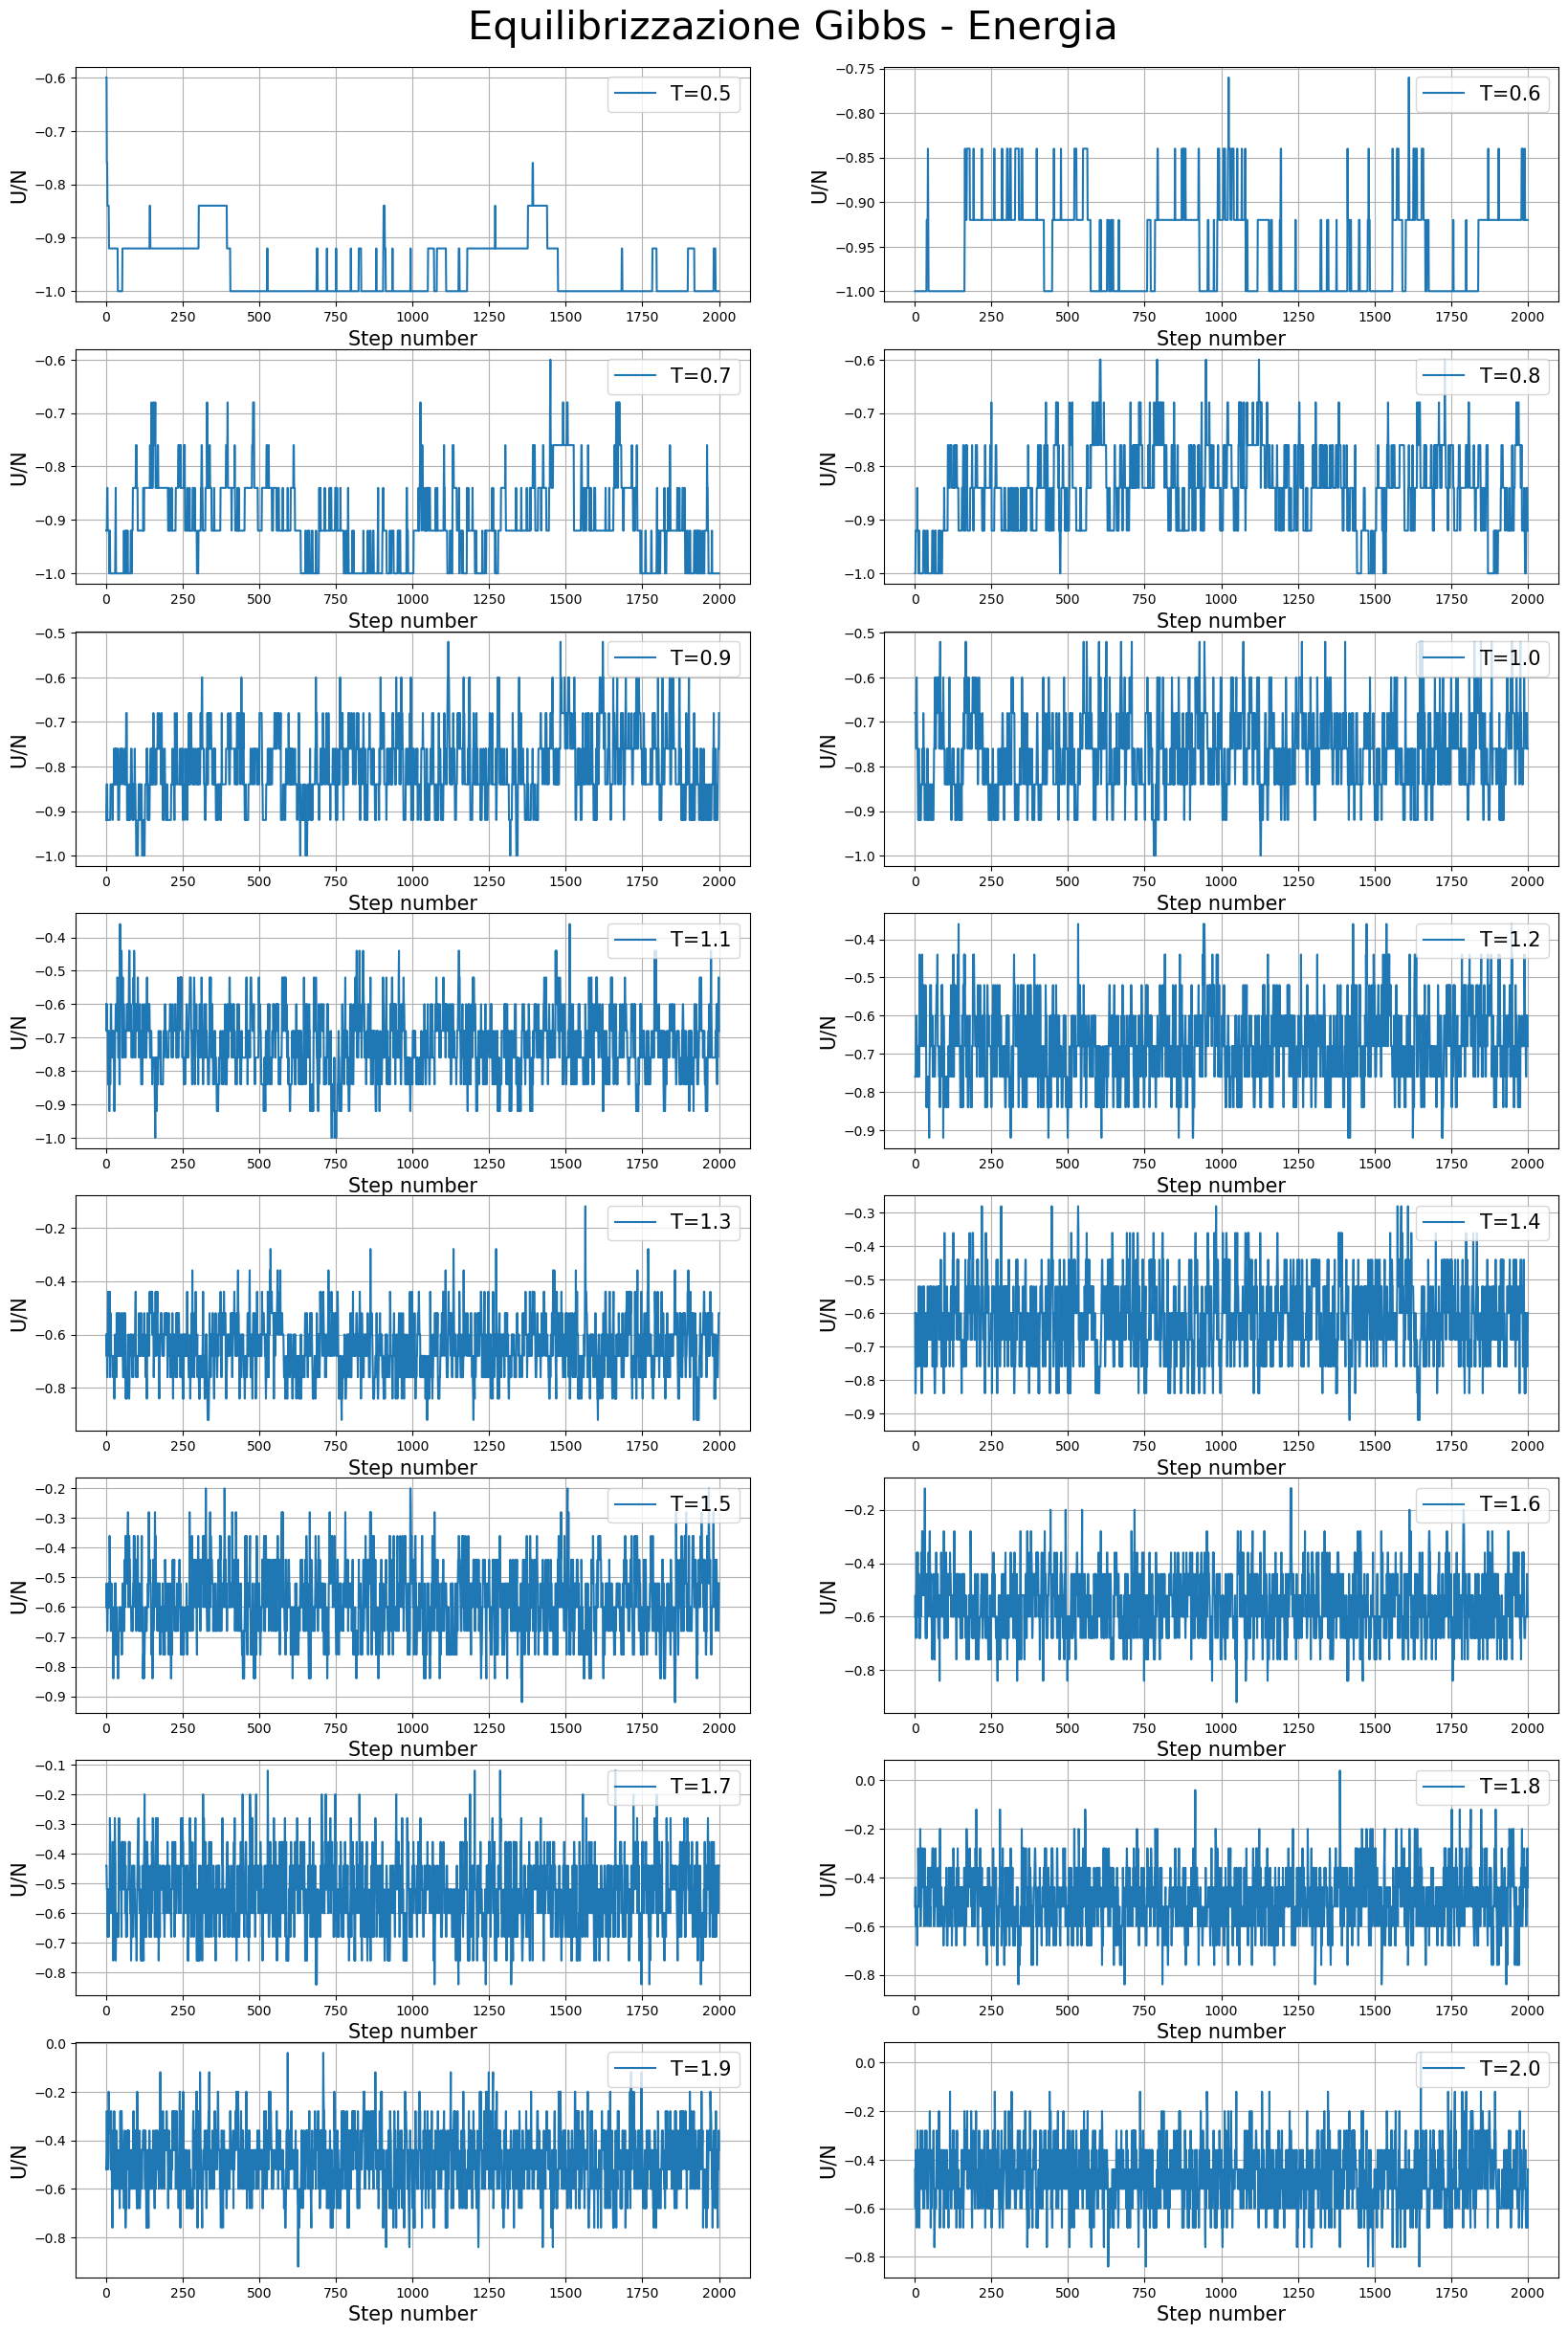

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =2000
x = np.arange(N)+1 
plt.figure(figsize=(20,30))
plt.suptitle ("Equilibrizzazione Gibbs - Energia", fontsize =30, y=0.9)
folders_name = ["0.5", "0.6", "0.7", "0.8", "0.9", "1.0", 
                "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "1.8", "1.9", "2.0"]

for z in range (16) : #sui 4 file per ogni T
    average = np.loadtxt("ISING_1D/equilibrio/Gibbs/"+folders_name[z]+"/output.ene.out", 
                                usecols = (2), delimiter=' ', unpack = True)
    plt.subplot (8, 2, z+1)
    plt.grid(True)
    plt.plot(x, average, label= "T="+folders_name[z])
    plt.ylabel("U/N", fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.legend(fontsize='15', loc='upper right')
    #plt.title("Total Energy per particle", fontweight='bold', fontsize = 20)

plt.show()

Coerentemente con quanto ci aspettiamo, osserviamo a bassa temperatura un marcato plateau dell'energia intorno -1 mentre, quando alziamo la temperatura, l'energia interna aumenta e non si stabilizza ad un valore costante. 

Per quanto riguarda il nostro obiettivo di equilibrare il sistema iniziale e', percio', sufficiente studiare il sistema alla temperatura piu' bassa possibile, cioe' $T=0.5$, e analizzare il raggiungimento di un valore costante.

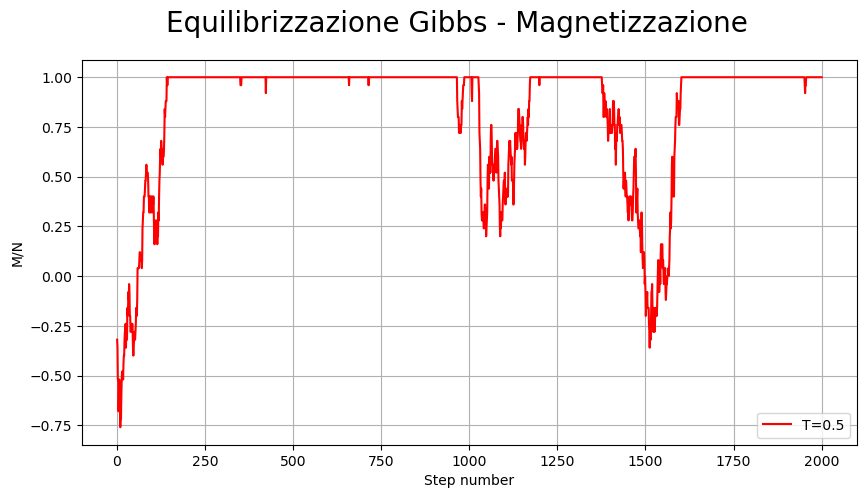

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =2000
x = np.arange(N)+1 
plt.figure(figsize=(10,5))
average = np.loadtxt("ISING_1D/Equilibrio/Gibbs/0.5/output.mag.out", usecols = (2), delimiter=' ', unpack = True)
plt.grid(True)
plt.plot(x, average, color = "red", label= "T=0.5")
plt.ylabel("M/N", fontsize = 10)
plt.xlabel('Step number', fontsize = 10)
plt.legend()
        
plt.suptitle ("Equilibrizzazione Gibbs - Magnetizzazione", fontsize =20)
plt.show()

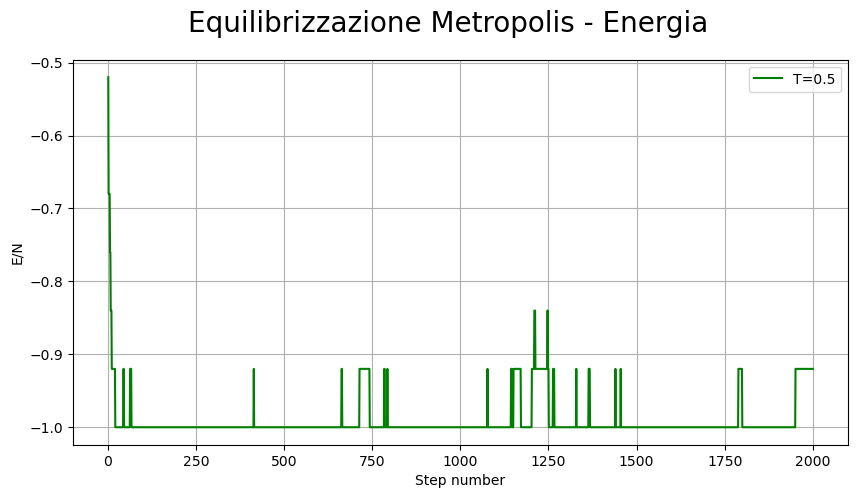

In [7]:
plt.figure(figsize=(10,5))
average = np.loadtxt("ISING_1D/Equilibrio/Metropolis/0.5/output.ene.out", usecols = (2), delimiter=' ', unpack = True)
plt.grid(True)
plt.plot(x, average, color = "green", label= "T=0.5")
plt.ylabel("E/N", fontsize = 10)
plt.xlabel('Step number', fontsize = 10)
plt.legend()
        
plt.suptitle ("Equilibrizzazione Metropolis - Energia", fontsize =20)
plt.show()

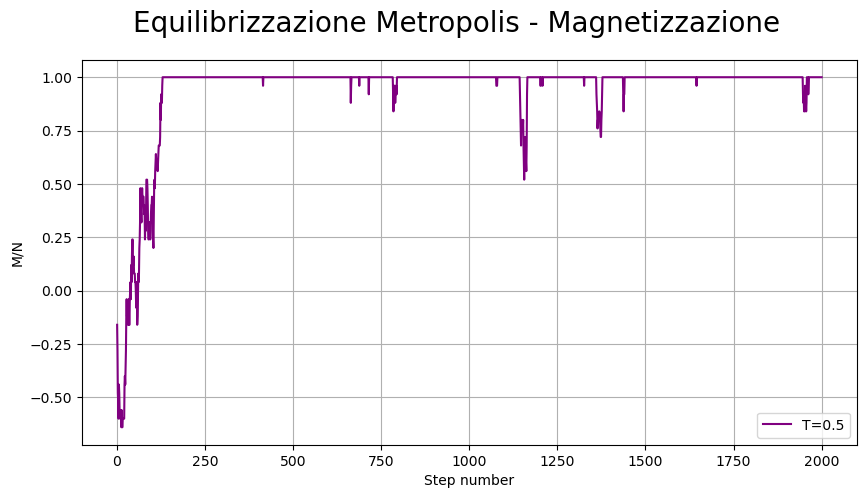

In [8]:
plt.figure(figsize=(10,5))
average = np.loadtxt("ISING_1D/Equilibrio/Metropolis/0.5/output.mag.out", usecols = (2), delimiter=' ', unpack = True)
plt.grid(True)
plt.plot(x, average, color = "purple", label= "T=0.5")
plt.ylabel("M/N", fontsize = 10)
plt.xlabel('Step number', fontsize = 10)
plt.legend()
        
plt.suptitle ("Equilibrizzazione Metropolis - Magnetizzazione", fontsize =20)
plt.show()

Possiamo, quindi, osservare come il sistema dopo 2000 steps sia sufficientemente equilibrato e presenta giusto qualche picco che pero' viene velocemente termalizzato. 

Come richiesto, abbiamo implementato una funzione di restart del codice da una configurazione finale precedente, ad esempio una configurazione di spin ormai termalizzata. Avendo, pero', osservato che dopo 2000 steps il sistema e' ormai pressoche' all'equilibrio, abbiamo ritenuto piu' efficiente effettuare 2000 step di simulazione, cioe' 2000 chiamate della funzione Move che genera una nuova configurazione ciclando su ogni spin e provando a flipparli uno ad uno, in cui il sistema viene lasciato evolvere ad ogni temperatura studiata. \
Dopo questo ciclo di termalizzazione, abbiamo effettuato lo studio del nostro sistema e delle grandezze che lo caratterizzano come descritto nel paragrafo successivo.

## Studio delle Grandezze Significative

Una volta equilibrizzato il sistema di spin, possiamo passare allo studio vero e proprio dell'andamento delle quantita' significative per descrivere il Modello di Ising 1D. Per poter effettuare la simulazione vera e propria, quindi, inseriamo nel file input il numero di blocchi e di step necessari, nel nostro caso 30 blocchi da $2 \times 10^5$ step ciascuno, e facciamo girare il programma 4 volte: sampling di Gibbs con campo esterno nullo, Gibbs con $h=0.02$, Metropolis con $h=0$ e Metropolis con $h=0.02$. Possiamo scegliere quale sampling utilizzare sempre dal file di input. 

E' necessario eseguire il codice due volte per ogni algoritmo di campionamento perche' a campo esterno nullo il sistema scrivera' in output l'andamento di U, C e $\chi$ mentre quando $h=0.02$ ci dara' come output solo l'andamento della magnetizzazione.
\
Non dovremo, inoltre, mai modificare la temperatura perche' il codice gia' cicla su tutte le temperature scelte per effettuare il nostro studio.


Di seguito riportiamo i risultati per l'energia interna, la capacita' termica, la suscettibilita' magnetica e la magnetizzazione plottando le stime al trentesimo blocco, quindi le nostre migliore stime, di media e errore nel caso dei due algoritmi di sampling paragonandole con l'andamento atteso trovato risolvendo analiticamente il Modello di Ising 1D.


### Energia Interna

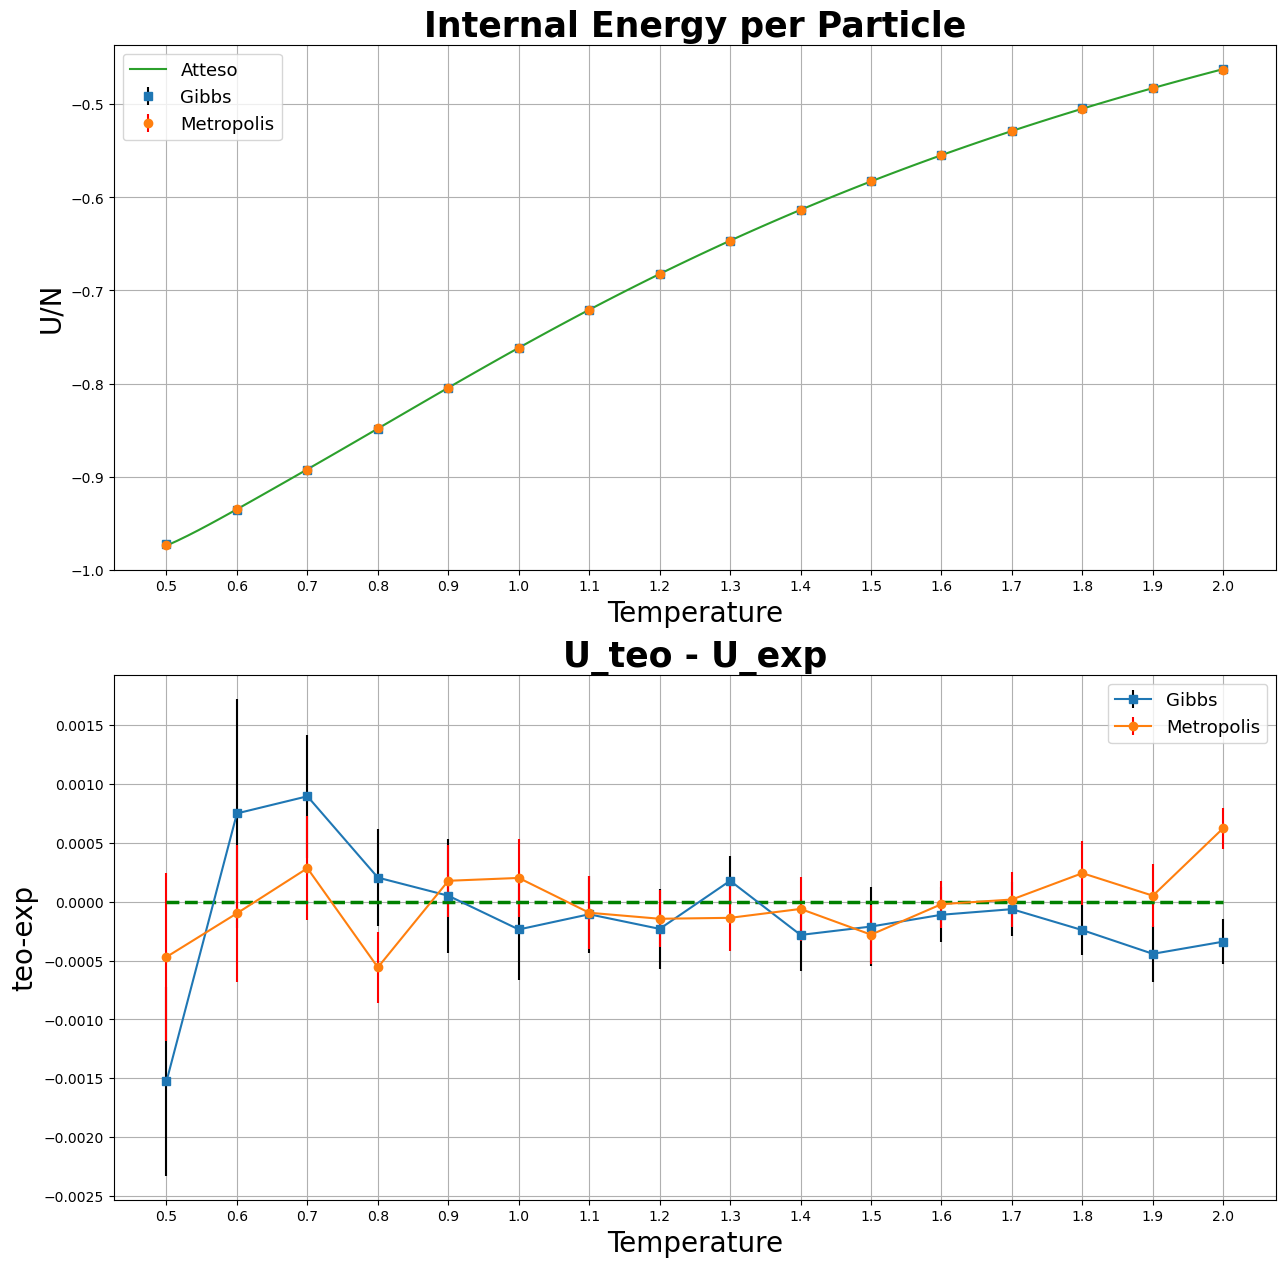

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(15,15))
#Plottiamo i dati di media e errore all'ultimo blocco per ogni temperatura (non sono quelli dell'ultimo blocco,
#la nostra migliore stima della quantita' per quella T)
plt.subplot(2, 1, 1)
temperature, energy_gibbs, energy_error_gibbs  = np.loadtxt("ISING_1D/Risultati_finali/Gibbs/ene_gibbs.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, energy_gibbs, yerr=energy_error_gibbs, ecolor='black', 
             marker = 's', label ="Gibbs", linestyle="none")


temperature, energy_metro, energy_error_metro  = np.loadtxt("ISING_1D/Risultati_finali/Metropolis/ene_metro.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, energy_metro, yerr=energy_error_metro, ecolor='red', 
             marker = 'o', label ="Metropolis", linestyle="none")

#Andamento teorico
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label = "Atteso")
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('U/N', fontsize=20)
plt.legend(fontsize="13")
plt.title('Internal Energy per Particle', fontsize=25, fontweight = "bold")
plt.grid(True)


th_discrete = np.tanh(J/temperature)
thN_discrete= th_discrete**Ns
ch_discrete = 1/th_discrete
e_discrete = -J*( th_discrete + ch_discrete*thN_discrete )/( 1 + thN_discrete )
plt.subplot(2, 1, 2)
plt.errorbar(temperature, e_discrete-energy_gibbs, yerr=energy_error_gibbs, marker='s', label="Gibbs", ecolor='black')
plt.errorbar(temperature, e_discrete-energy_metro, yerr=energy_error_metro, marker='o',  label="Metropolis", ecolor='red')
plt.hlines(0, 0.5, 2, colors='green', linestyles='dashed', linewidth =2.5)
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('teo-exp', fontsize=20)
plt.legend(fontsize="13")
plt.title('U_teo - U_exp', fontsize=25, fontweight = "bold")
plt.grid(True)

plt.show()

Nel primo grafico non abbiamo riportato la linea dell'andamento dei dati estratti con l'algoritmo di Gibbs e con quello di Metropolis perche' avrebbero coperto completamente l'andamento teorico. \
Osserviamo che a temperature molto basse siamo pressoche' nel ground state e il sistema tende a congelarsi. Quando, invece, ci spostiamo da T molto basse, la termicita' del sistema fa entrare difetti nell'ordine perfetto e percio'aumenta l'energia interna.

### Capacita' termica

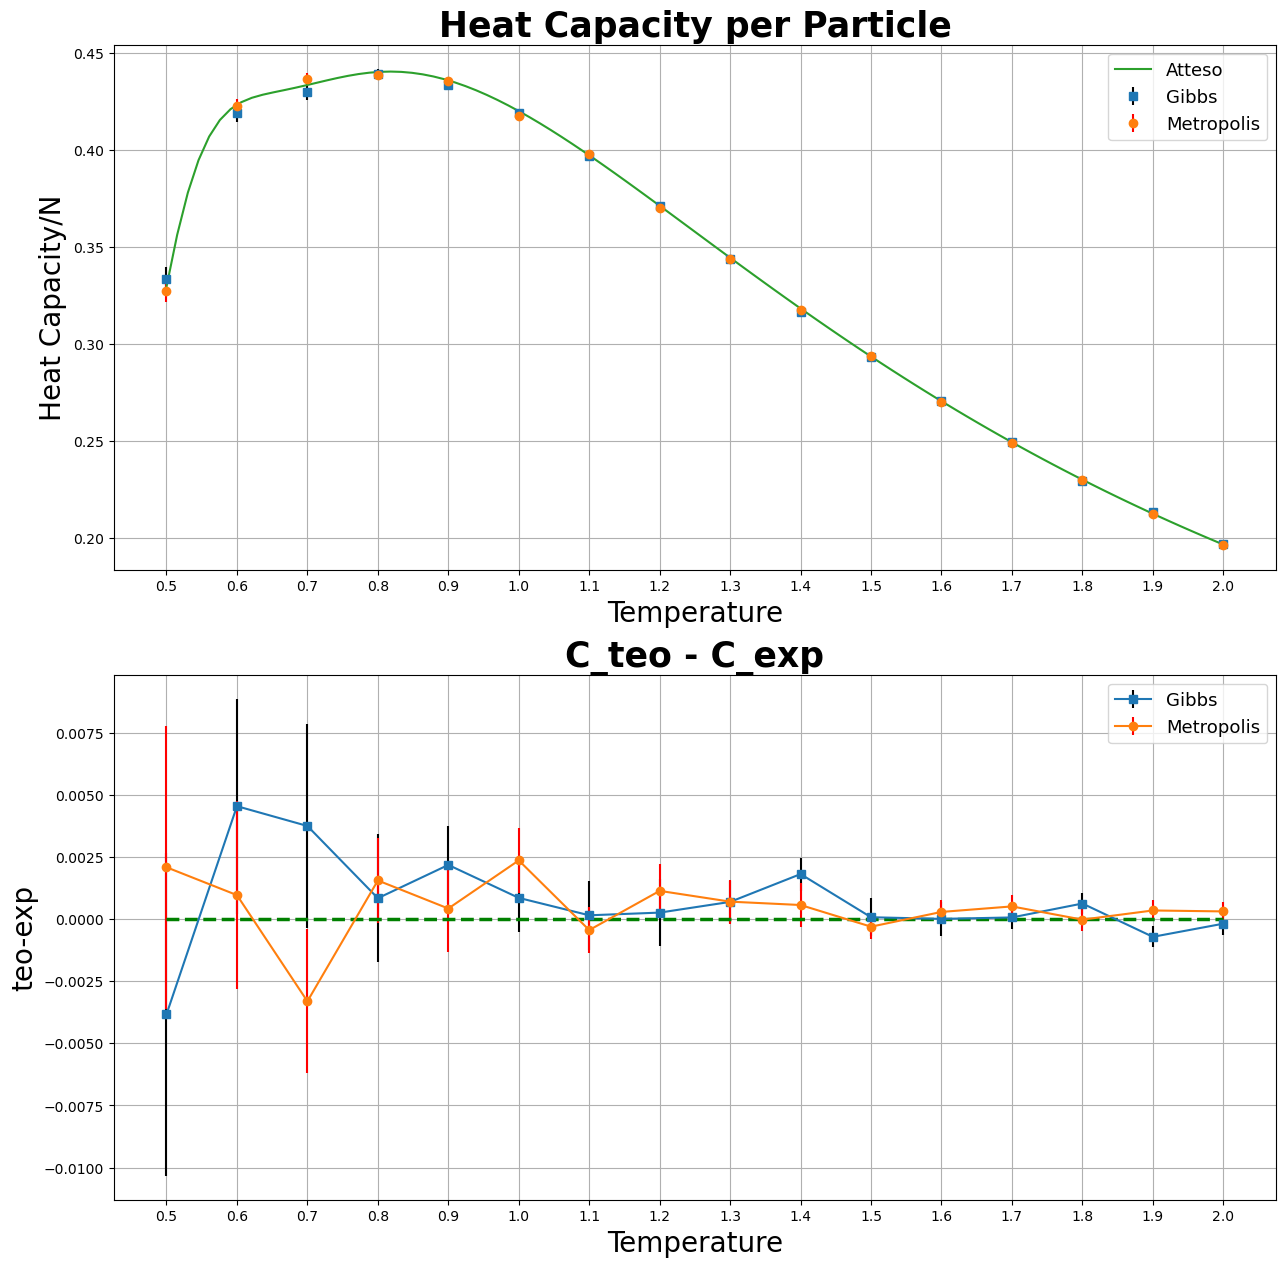

In [2]:
plt.figure(figsize=(15,15))

plt.subplot(2, 1, 1)
temperature, heat_gibbs, heat_error_gibbs  = np.loadtxt("ISING_1D/Risultati_finali/Gibbs/heat_gibbs.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, heat_gibbs, yerr=heat_error_gibbs, ecolor='black', 
             marker = 's', label ="Gibbs", linestyle="none")


temperature, heat_metro, heat_error_metro  = np.loadtxt("ISING_1D/Risultati_finali/Metropolis/heat_metro.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, heat_metro, yerr=heat_error_metro, ecolor='red', 
             marker = 'o', label ="Metropolis", linestyle="none")

#Andamento teorico
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label = "Atteso")
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Heat Capacity/N', fontsize=20)
plt.legend(fontsize="13")
plt.title('Heat Capacity per Particle', fontsize=25, fontweight="bold")
plt.grid(True)

beta_discrete = 1/temperature
th_discrete = np.tanh(J/temperature)
thN_discrete= th_discrete**Ns
ch_discrete = 1/th_discrete
heat_discrete=((beta_discrete*J)**2)*(((1+thN_discrete+(Ns-1)*(th_discrete**2)
                                        +(Ns-1)*(ch_discrete**2)*thN_discrete)/(1+thN_discrete))
                                      -Ns*((th_discrete+ch_discrete*thN_discrete)/(1+thN_discrete))**2)
plt.subplot(2, 1, 2)
plt.errorbar(temperature, heat_discrete-heat_gibbs, yerr=heat_error_gibbs, marker='s', label="Gibbs", ecolor='black')
plt.errorbar(temperature, heat_discrete-heat_metro, yerr=heat_error_metro, marker='o',  label="Metropolis", ecolor='red')
plt.hlines(0, 0.5, 2, colors='green', linestyles='dashed', linewidth =2.5)
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('teo-exp', fontsize=20)
plt.legend(fontsize="13")
plt.title('C_teo - C_exp', fontsize=25, fontweight = "bold")
plt.grid(True)

plt.show()

Nello studio della capacita' termica, cioe' di come il sistema puo' cedere o acquisire energia termica quindi calore, vediamo che i nostri campionamenti si discostano dall'andamento teorico a basse T, ma vanno a combaciare con esso a piu' alte T. \
Il picco rappresenta una sorta di aborto di transizione di fase dato che il modello di Ising 1D non ha una transizione di fase.

### Suscettibilita' magnetica

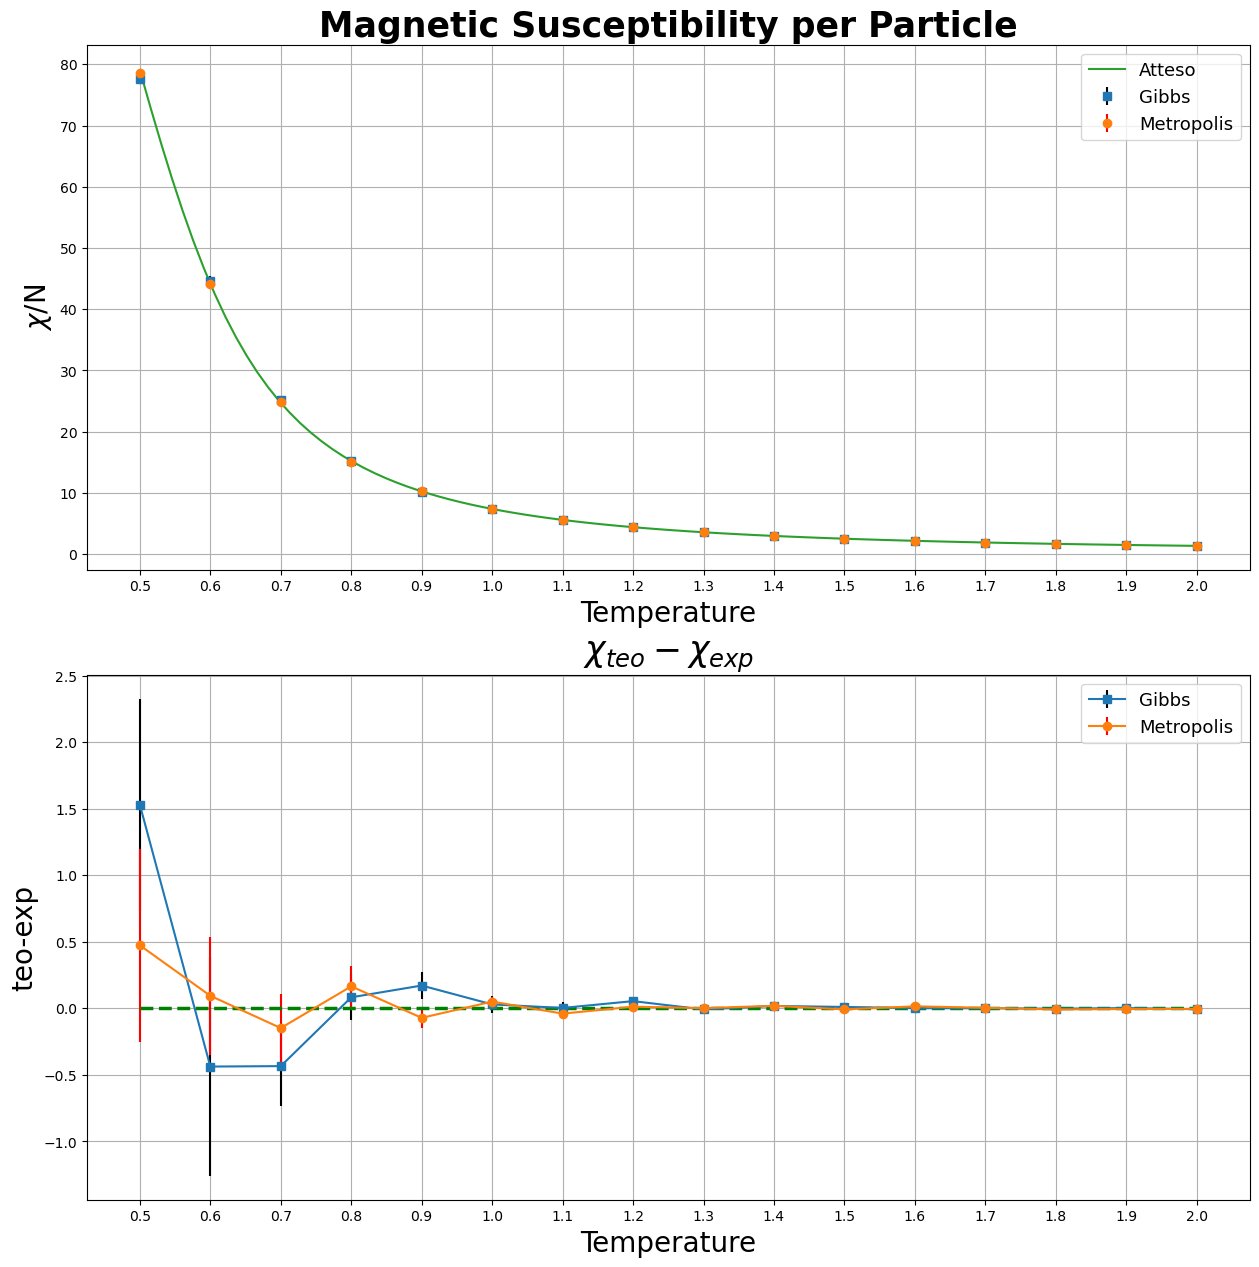

In [3]:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
temperature, chi_gibbs, chi_error_gibbs  = np.loadtxt("ISING_1D/Risultati_finali/Gibbs/chi_gibbs.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, chi_gibbs, yerr=chi_error_gibbs, ecolor='black', 
             marker = 's', label ="Gibbs", linestyle="none")


temperature, chi_metro, chi_error_metro  = np.loadtxt("ISING_1D/Risultati_finali/Metropolis/chi_metro.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, chi_metro, yerr=chi_error_metro, ecolor='red', 
             marker = 'o', label ="Metropolis", linestyle="none")

#Andamento teorico
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label = "Atteso")
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('$\chi$/N', fontsize=20)
plt.legend(fontsize="13")
plt.title('Magnetic Susceptibility per Particle', fontsize=25, fontweight="bold")
plt.grid(True)

beta_discrete = 1/temperature
th_discrete = np.tanh(J/temperature)
thN_discrete= th_discrete**Ns
ch_discrete = 1/th_discrete
X_discrete = beta_discrete*np.exp(2*beta_discrete*J)*(1-thN_discrete)/(1+thN_discrete)
plt.subplot(2, 1, 2)
plt.errorbar(temperature, X_discrete-chi_gibbs, yerr=chi_error_gibbs, marker='s', label="Gibbs", ecolor='black')
plt.errorbar(temperature, X_discrete-chi_metro, yerr=chi_error_metro, marker='o',  label="Metropolis", ecolor='red')
plt.hlines(0, 0.5, 2, colors='green', linestyles='dashed', linewidth =2.5)
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('teo-exp', fontsize=20)
plt.legend(fontsize="13")
plt.title('$\chi_{teo} - \chi_{exp}$', fontsize=25, fontweight="bold")
plt.grid(True)

plt.show()

Analizzando la suscettibilita' magnetica, i.e. come risponde la magnetizzazione del campione rispetto una variazione del campo esterno che abbiamo visto essere uguale alle fluttuazioni all'equilibrio della magnetizzazione, notiamo una buona compatibilita' tra l'andamento atteso e i nostri due metodi di sampling. \
Ad alte T il sistema e' poco suscettibile a variazioni del campo ext perche' gli spin tendono ad essere poco allineati fra loro. Appena la temperatura e' piu' bassa, pero', c'e' un esplosione della suscettibilita': il sistema rispondera' molto prontamente ad una variazione del campo esterno con una variazione di M magnetizzazione del sistema elevata .

### Magnetizzazione

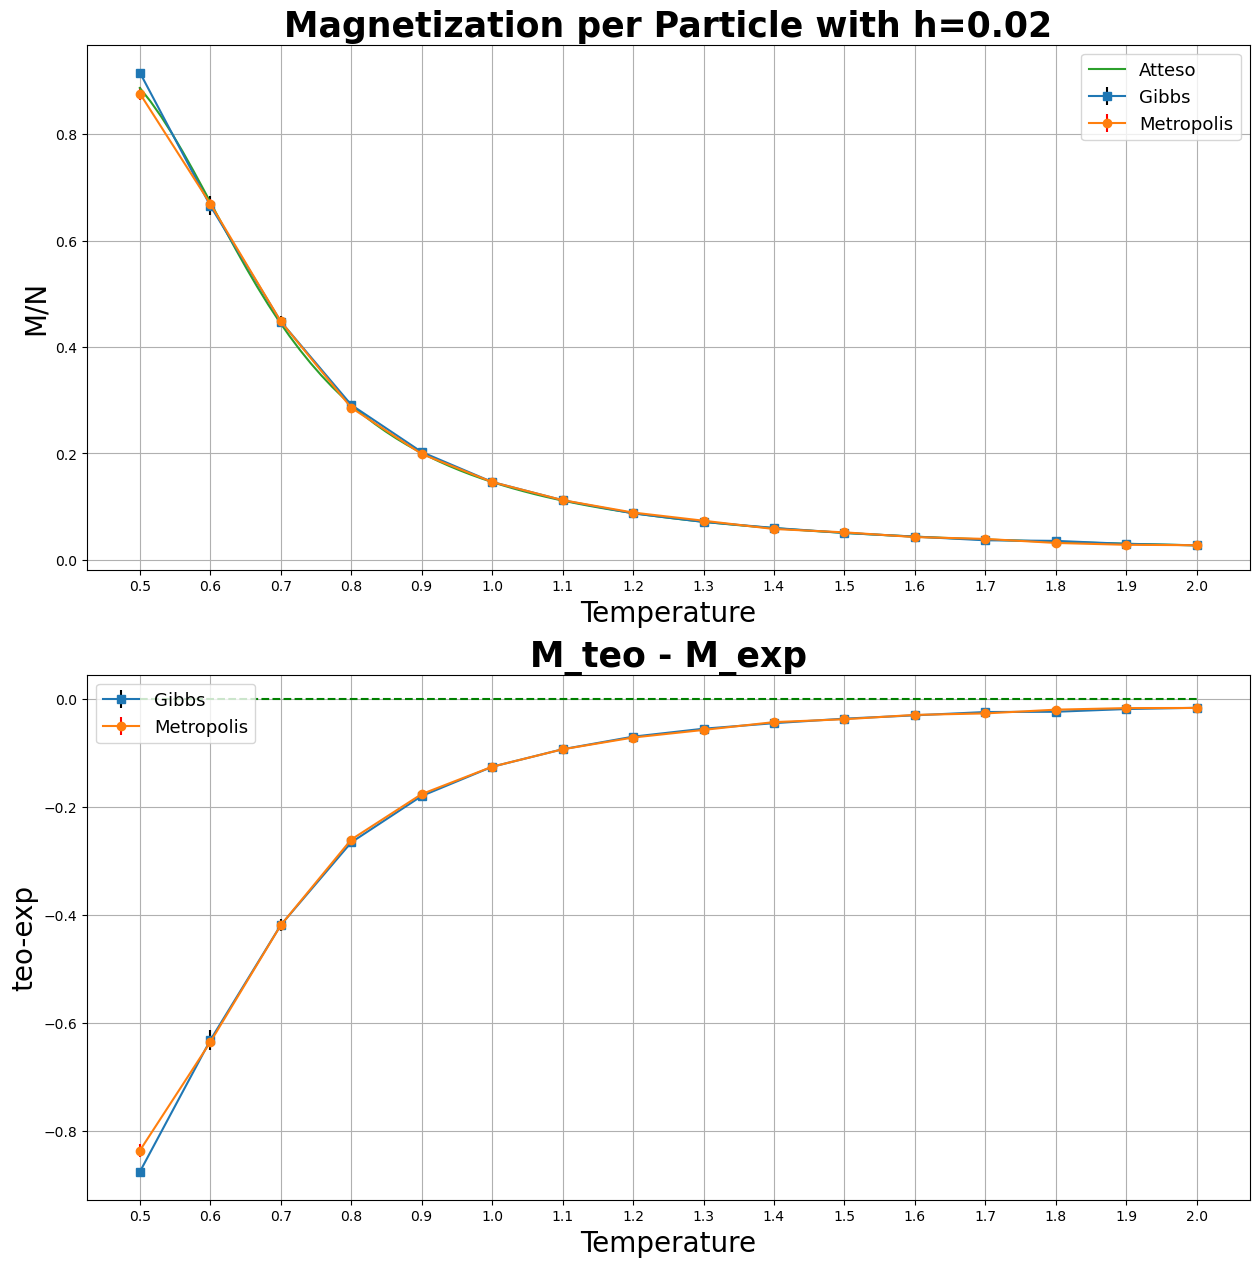

In [4]:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
temperature, mag_gibbs, mag_error_gibbs  = np.loadtxt("ISING_1D/Risultati_finali/Gibbs/mag_gibbs.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, mag_gibbs, yerr=mag_error_gibbs, ecolor='black', 
             marker = 's', label ="Gibbs")


temperature, mag_metro, mag_error_metro  = np.loadtxt("ISING_1D/Risultati_finali/Metropolis/mag_metro.out", 
                                                            usecols=(0, 1, 2), unpack=True, delimiter=' ')
plt.errorbar(temperature, mag_metro, yerr=mag_error_metro, ecolor='red', 
             marker = 'o', label ="Metropolis")
#Andamento teorico
points=100
T = np.linspace(0.5,2.0,num=points)
#beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)
    -2*np.sinh(2*b*J)))+ (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)
    -2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label = "Atteso")
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('M/N', fontsize=20)
plt.legend(fontsize="13")
plt.title('Magnetization per Particle with h=0.02', fontsize=25, fontweight = "bold")
plt.grid(True)


th_discrete = np.tanh(J/temperature)
thN_discrete= th_discrete**Ns
ch_discrete = 1/th_discrete
b_discrete = 1/temperature
l1_discrete = np.exp(b_discrete*J)*np.cosh(b_discrete*h)
+np.sqrt(np.exp(2*b_discrete*J)*np.cosh(b_discrete*h)*np.cosh(b_discrete*h)-2*np.sinh(2*b_discrete*J))
l2_discrete = np.exp(b_discrete*J)*np.cosh(b_discrete*h)
-np.sqrt(np.exp(2*b_discrete*J)*np.cosh(b_discrete*h)*np.cosh(b_discrete*h)-2*np.sinh(2*b_discrete*J))
Z_discrete = l1_discrete**Ns + l2_discrete**Ns
M_discrete = (np.exp(b_discrete*J)*np.sinh(b_discrete*h)*((l1_discrete**(Ns-1))
            *(1+np.exp(b_discrete*J)*np.cosh(b_discrete*h)/np.sqrt(np.exp(2*b_discrete*J)*np.cosh(b_discrete*h)
            *np.cosh(b_discrete*h) -2*np.sinh(2*b_discrete*J)))+ (l2_discrete**(Ns-1))*(1-np.exp(b_discrete*J)
            *np.cosh(b_discrete*h)/np.sqrt(np.exp(2*b_discrete*J)*np.cosh(b_discrete*h)*np.cosh(b_discrete*h)
            -2*np.sinh(2*b_discrete*J)))))/(Z_discrete)
plt.subplot(2, 1, 2)
plt.errorbar(temperature, M_discrete-mag_gibbs, yerr=mag_error_gibbs, marker='s', label="Gibbs", ecolor='black')
plt.errorbar(temperature, M_discrete-mag_metro, yerr=mag_error_metro, marker='o',  label="Metropolis", ecolor='red')
plt.hlines(0, 0.5, 2, colors='green', linestyles='dashed')
plt.xticks(np.arange(0.5,2.1,0.1))
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('teo-exp', fontsize=20)
plt.legend(fontsize="13")
plt.title('M_teo - M_exp', fontsize=25, fontweight = "bold")
plt.grid(True)

plt.show()

Possiamo notare ancora, come nella capacita' termica, che a basse temperature le nostre stime partono discostate dall'andamento teorico, ma tendono a sovrapporsi ad esso alzando la T. \
Possiamo notare, inoltre, come alle piu' basse temperature la magnetizzazione indotta dal campo esterno sia praticamente totale.